In [5]:
pkg load control

disp('HEAVY WEIGHT TRUCKS SOLD') 

trucks=csvread(
"./MY_DATA/trucks.csv");
trucks=trucks(303:685,2); % column 2 is monthly not seasonally adjusted data from 02-1992 to 12-2023
size(trucks) % dimension to for time vector

disp('NEW PRIVATE HOUSING UNITS STARTED') 

house=csvread(
"./MY_DATA/housedata.csv");
house=house(399:781,3); % column 3 = monthly data, from 02-1992 to 12-2023
size(house)

HEAVY WEIGHT TRUCKS SOLD
ans =

   383     1

NEW PRIVATE HOUSING UNITS STARTED
ans =

   383     1



In [6]:
disp('TOOLBOX CONFIGURATION')
e4init % E4 toolbox 

TOOLBOX CONFIGURATION

            XXXXXX 4 4      XXXXX  XX     XX  XX  XXXXXX (c)
           XX      444     XX  XX XX     XX  XX  XX
          XXXX       4    XXXXX  XX     XX  XX  XXXXXX
         XX              XX     XX     XX  XX      XX
        XXXXXX          XX     XXXXXX XXXXXX  XXXXXX

    Toolbox for State Space Estimation of Econometric Models
 
*********************** Options set by user ********************
Filter. . . . . . . . . . . . . : KALMAN
Scaled B and M matrices . . . . : NO
Initial state vector. . . . . . : AUTOMATIC SELECTION
Initial covariance of state v.  : IDEJONG
Variance or Cholesky factor?  . : VARIANCE
Optimization algorithm. . . . . : BFGS
Maximum step length . . . . . . : 0.100000
Stop tolerance. . . . . . . . . : 0.000010
Max. number of iterations . . . :       75
Verbose iterations. . . . . . . : YES
****************************************************************
 
 


In [7]:
disp('LDHR code')
PaPtrucks=12./(0:6) % vector con periodos correspondientes a la estacionalidad para datos mensuales. 
TVPaPtrucks=[1 1 1 1 1 1 1;1 0 0 0 0 0 0] 


disp('HEAVYWEIGHT TRUCKS DATASET')


warning('off','all');
[VARtrucks,Ptrucks,TVPtrucks,oartrucks]=autodhr(trucks,12,[],[],PaPtrucks,TVPaPtrucks,1) 
NVRtrucks=VARtrucks(2:8)./VARtrucks(1) % calculation of variance ratios 
filt=0;
[trendtrucks,seasontrucks,cycletrucks,irregtrucks]=dhrfilt(trucks,Ptrucks,TVPtrucks,VARtrucks,12,filt,0);
% the 4 components of time series

LDHR code
PaPtrucks =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPaPtrucks =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

HEAVYWEIGHT TRUCKS DATASET
VARtrucks =

 Columns 1 through 6:

   1.2503e+00   2.5020e-02   2.2568e-02   3.8946e-03   6.5374e-03   3.4359e-02

 Columns 7 and 8:

   1.4329e-02   6.4346e-03

Ptrucks =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPtrucks =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

oartrucks = 26
NVRtrucks =

 Columns 1 through 6:

   2.0011e-02   1.8050e-02   3.1149e-03   5.2286e-03   2.7480e-02   1.1460e-02

 Column 7:

   5.1464e-03



MONTHLY DATA, TREND


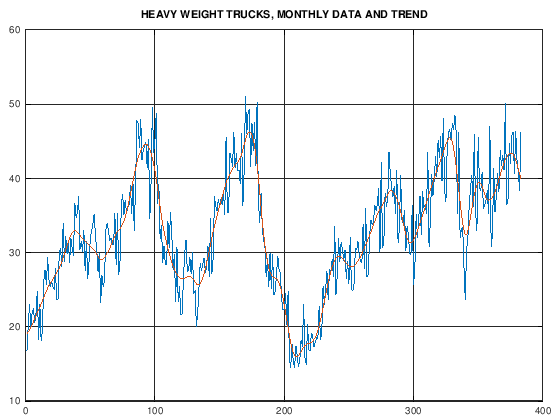

In [9]:
%plot --format png
disp('MONTHLY DATA, TREND')
trendtrucks=trendtrucks(:,1); % the first column of trend is the trend vector
plot([trucks,trendtrucks],'linewidth',1.4)
grid on
title('HEAVY WEIGHT TRUCKS, MONTHLY DATA AND TREND')

In [10]:
disp('CREATING TIME VECTOR')
% addpath('C:\Program Files\PracticasLDHR-main')
% savepath
% addpath('C:\Program Files\PracticasLDHR-main\functions')
% savepath
time=timefmt4(12,1992,2,383); % last input = number of rows of heavy weight trucks and housing units started
time=time(3:end,:); % we start from third obs since we need the time of differenced trend (1st obs = stringname obs)
disp('FIRST DIFFERENCE OF TREND')
dtrendtrucks=diff(trendtrucks); % first difference of trend vector
size(time)
size(dtrendtrucks)

CREATING TIME VECTOR
FIRST DIFFERENCE OF TREND
ans =

   382    12

ans =

   382     1



In [11]:
disp('CONFIRMATION OF A RECESSION')
window = 1; % window size for consecutive negative values
confirmedrectrucks = []; % array to store the indices of confirmation of a recession
% Loop through the elements of dtrend
for i = 2:(length(dtrendtrucks) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendtrucks(i:i+window-1) < 0) && dtrendtrucks(i-1) > 0 
        confirmedrectrucks=[confirmedrectrucks, i + window - 1]; % if the condition is met, store the index of the nth negative element
    end
end
disp('Indices of the nth negative element of sm_dtrend preceded by a positive value:');
confirmedrectrucks=confirmedrectrucks'; % to column vector from row vector 
size(dtrendtrucks); % the vector we are using
size(time); % checking time vector size
recessiontimetrucks=time(confirmedrectrucks,:); % DATES OF CONFIRMED RECESSION
recessiontrucks=dtrendtrucks(confirmedrectrucks,:); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
Indices of the nth negative element of sm_dtrend preceded by a positive value:


In [12]:
disp('CONFIRMATION OF EXPANSION')
window = 1;  % window size for consecutive values
confirmedexptrucks = [];  % array to store the indices of confirmation of a recession or expansion
% Loop through the elements of dtrendhouse
for i = 2:(length(dtrendtrucks) - window + 1)
    if all(dtrendtrucks(i:i+window-1) > 0) && dtrendtrucks(i-1) < 0
        confirmedexptrucks = [confirmedexptrucks, i + window - 1];
    end
end

disp('Indices of the nth positive element of dtrendhouse preceded by a negative value:');
confirmedexptrucks = confirmedexptrucks';  % Convert to a column vector
expansiontimetrucks=time(confirmedexptrucks,:);
expansiontrucks=dtrendtrucks(confirmedexptrucks,:);

CONFIRMATION OF EXPANSION
Indices of the nth positive element of dtrendhouse preceded by a negative value:


PLOTTING TREND WITH RECESSION AND EXPANSION DATES
ans = -32.020


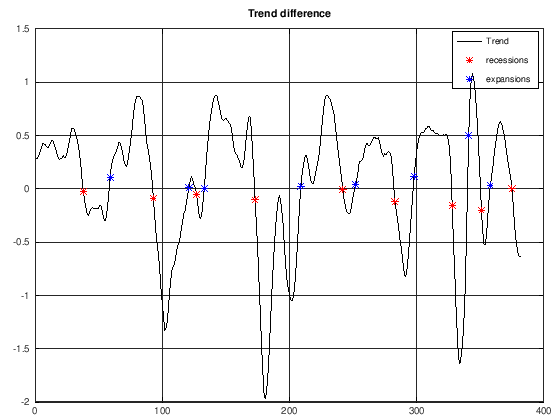

In [13]:
%plot --format png
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')
plot(dtrendtrucks,'k','linewidth',1.4)
hold on
plot(confirmedrectrucks,recessiontrucks,'r*','linewidth',1.3) % red are recessions
plot(confirmedexptrucks,expansiontrucks,'b*','linewidth',1.3) % green are expansions
% plot(poslocation,picos,'m*','linewidth',1.3) % plotting local maxima, turning points 
% plot(neglocation,valles,'k*','linewidth',1.4) % plotting local minima, turning points 
hold off
grid on
title('Trend difference')
legend('Trend','recessions','expansions')

In [14]:
disp('DATES OF EXPANSIONS AND RECESSIONS')
disp('Heavy weight trucks')
expansiontimetrucks % date when trend derivative >0
recessiontimetrucks % date when trend derivative <0
disp('Heavy weight trucks show a lagging nature in some periods and a leading nature in other periods')

DATES OF EXPANSIONS AND RECESSIONS
Heavy weight trucks
expansiontimetrucks =

1997-01-01  
2002-03-01  
2003-03-01  
2009-07-01  
2013-02-01  
2016-12-01  
2020-07-01  
2021-12-01  

recessiontimetrucks =

1995-04-01  
1999-11-01  
2002-09-01  
2006-07-01  
2012-04-01  
2015-09-01  
2019-06-01  
2021-05-01  
2023-05-01  

Heavy weight trucks show a lagging nature in some periods and a leading nature in other periods


In [19]:
times=timefmt4(12,1992,2,383); % last input = number of rows of vectors of cars, houses and conworkers, can index with (obs,:)
times=times(3:end,:); % dataset starts at 01/02/1992 and ends at 01/08/2007 
PaPhouse=12./(0:6) % vector con periodos correspondientes a la estacionalidad para datos mensuales. 
TVPaPhouse=[1 1 1 1 1 1 1;1 0 0 0 0 0 0] 


disp('NEW HOUSING UNITS DATASET')


warning('off','all');
[VARhouse,Phouse,TVPhouse,oarhouse]=autodhr(house,12,[],[],PaPhouse,TVPaPhouse,1) 
% IMPORTANT TO PUT 1 AT THE END OF THE AUTODHR FUNCTION!
NVRhouse=VARhouse(2:8)./VARhouse(1) % calculation of variance ratios 
filt=0;
[trendhouse,seasonhouse,cyclehouse,irreghouse]=dhrfilt(house,Phouse,TVPhouse,VARhouse,12,filt,0);

PaPhouse =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPaPhouse =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

NEW HOUSING UNITS DATASET
VARhouse =

   24.8482    0.1338    0.8301    0.3636    0.2119    0.2786         0    0.0224

Phouse =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPhouse =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

oarhouse = 31
NVRhouse =

   0.005383   0.033409   0.014634   0.008529   0.011214          0   0.000903



HOUSING UNITS STARTED, TREND
FIRST DIFFERENCE OF TREND


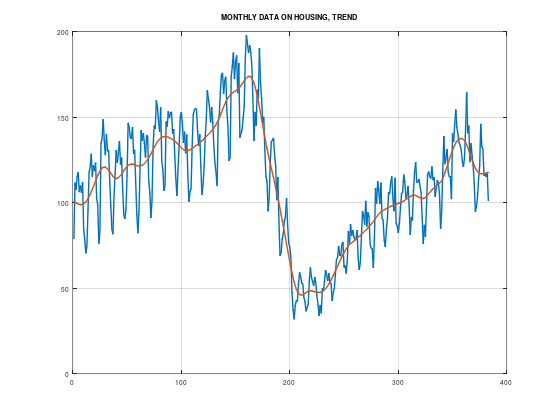

In [20]:
disp('HOUSING UNITS STARTED, TREND')
trendhouse=trendhouse(:,1); % the first column of trend is the trend vector
plot([house,trendhouse],'linewidth',1.4)
grid on
title('MONTHLY DATA ON HOUSING, TREND')
disp('FIRST DIFFERENCE OF TREND')
dtrendhouse=diff(trendhouse); % first difference of trend vector

In [21]:
disp('CONFIRMATION OF A RECESSION')
window = 1; % window size for consecutive negative values
confirmedrechouse = []; % array to store the indices of confirmation of a recession
% Loop through the elements of dtrend
for i = 2:(length(dtrendhouse) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendhouse(i:i+window-1) < 0) && dtrendhouse(i-1) > 0 
        confirmedrechouse=[confirmedrechouse, i + window - 1]; % if the condition is met, store the index of the nth negative element
    end
end
disp('Indices of the nth negative element of sm_dtrend preceded by a positive value:');
confirmedrechouse=confirmedrechouse'; % to column vector from row vector 
size(dtrendhouse); % the vector we are using
size(times); % checking time vector size
recessiontimehouse=times(confirmedrechouse,:); % DATES OF CONFIRMED RECESSION
recessionhouse=dtrendhouse(confirmedrechouse,:); % the values in trend that are recession points
dtrendhouse;

CONFIRMATION OF A RECESSION
Indices of the nth negative element of sm_dtrend preceded by a positive value:


In [22]:
disp('CONFIRMATION OF EXPANSION')
window = 1;  % window size for consecutive values
confirmedexphouse = [];  % array to store the indices of confirmation of a recession or expansion
% Loop through the elements of dtrendhouse
for i = 2:(length(dtrendhouse) - window + 1)
    if all(dtrendhouse(i:i+window-1) > 0) && dtrendhouse(i-1) < 0
        confirmedexphouse = [confirmedexphouse, i + window - 1];
    end
end

disp('Indices of the nth positive element of dtrendhouse preceded by a negative value:');
confirmedexphouse = confirmedexphouse';  % Convert to a column vector
expansiontimehouse=times(confirmedexphouse,:);
expansionhouse=dtrendhouse(confirmedexphouse,:);

CONFIRMATION OF EXPANSION
Indices of the nth positive element of dtrendhouse preceded by a negative value:


PLOTTING TREND WITH RECESSION AND EXPANSION DATES


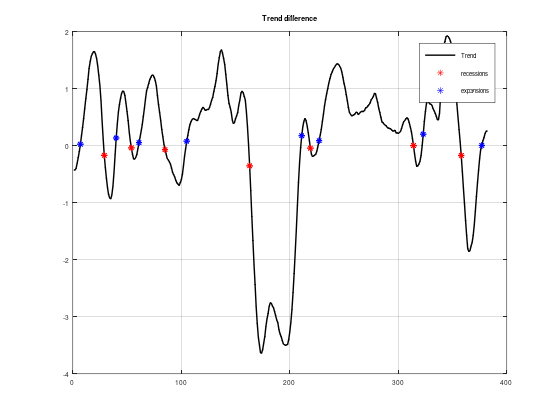

In [23]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')
plot(dtrendhouse,'k','linewidth',1.4)
hold on
plot(confirmedrechouse,recessionhouse,'r*','linewidth',1.3) % red are recessions
plot(confirmedexphouse,expansionhouse,'b*','linewidth',1.3) % green are expansions
hold off
grid on
title('Trend difference')
legend('Trend','recessions','expansions')

In [24]:
disp('DATES OF EXPANSIONS AND RECESSIONS')
disp('New housing units started')
expansiontimehouse % date when trend derivative >0
recessiontimehouse % date when trend derivative <0
disp('New housing units started show a coincident nature')

DATES OF EXPANSIONS AND RECESSIONS
New housing units started
expansiontimehouse =

1992-09-01  
1995-06-01  
1997-03-01  
2000-11-01  
2009-09-01  
2011-01-01  
2019-01-01  
2023-07-01  

recessiontimehouse =

1994-07-01  
1996-08-01  
1999-03-01  
2005-09-01  
2010-05-01  
2018-04-01  
2021-12-01  

New housing units started show a coincident nature


In [25]:
disp('NON DEFENSE CAPITAL GOODS DATASET')

steel=csvread(
"./MY_DATA/capital.csv");
steel=steel(2:384,2); % column 2 is monthly not seasonally adjusted data from 02-1992 to 12-2023
size(steel) % dimension to for time vector
steel;

timesteel=timefmt4(12,1992,2,383);
timesteel=timesteel(3:end,:); % getting rid of first obs to match differenced trend

PaPsteel=12./(0:6) % vector con periodos correspondientes a la estacionalidad para datos mensuales. 
TVPaPsteel=[1 1 1 1 1 1 1;1 0 0 0 0 0 0] 
warning('off','all');

[VARsteel,Psteel,TVPsteel,oarsteel]=autodhr(steel,12,[],[],PaPsteel,TVPaPsteel,1) 
NVRsteel=VARsteel(2:8)./VARsteel(1) % calculation of variance ratios 
filt=0;
[trendsteel,seasonsteel,cyclesteel,irregsteel]=dhrfilt(steel,Psteel,TVPsteel,VARsteel,12,filt,0);

NON DEFENSE CAPITAL GOODS DATASET
ans =

   383     1

PaPsteel =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPaPsteel =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

VARsteel =

 Columns 1 through 6:

   1.0657e+06   2.4376e+04   2.2185e+04   3.0132e+03   2.2045e+03   4.1797e+04

 Columns 7 and 8:

   4.8047e+03            0

Psteel =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPsteel =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

oarsteel = 36
NVRsteel =

   0.022873   0.020817   0.002827   0.002069   0.039220   0.004508          0



NEW DATA, TREND
FIRST DIFFERENCE OF TREND


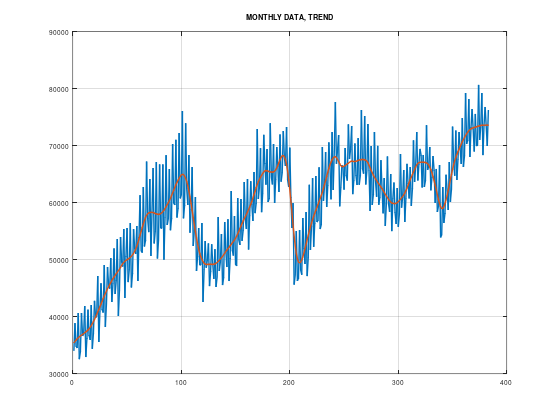

In [26]:
disp('NEW DATA, TREND')
trendsteel=trendsteel(:,1); % the first column of trend is the trend vector
plot([steel,trendsteel],'linewidth',1.4)
grid on
title('MONTHLY DATA, TREND')
disp('FIRST DIFFERENCE OF TREND')
dtrendsteel=diff(trendsteel); % first difference of trend vector

In [27]:
disp('CONFIRMATION OF A RECESSION')
window = 1; % window size for consecutive negative values
confirmedrecsteel = []; % array to store the indices of confirmation of a recession
% Loop through the elements of dtrend
for i = 2:(length(dtrendsteel) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendsteel(i:i+window-1) < 0) && dtrendsteel(i-1) > 0 
        confirmedrecsteel=[confirmedrecsteel, i + window - 1]; % if the condition is met, store the index of the nth negative element
    end
end
disp('Indices of the nth negative element of sm_dtrend preceded by a positive value:');
confirmedrecsteel=confirmedrecsteel'; % to column vector from row vector 
size(dtrendsteel) % the vector we are using
size(timesteel) % checking time vector size
recessiontimesteel=timesteel(confirmedrecsteel,:); % DATES OF CONFIRMED RECESSION
recessionsteel=dtrendsteel(confirmedrecsteel,:); % the values in trend that are recession points
dtrendsteel;
timesteel; % no first date because the first obs is gone with dtrend

CONFIRMATION OF A RECESSION
Indices of the nth negative element of sm_dtrend preceded by a positive value:
ans =

   382     1

ans =

   382    12



In [28]:
disp('CONFIRMATION OF EXPANSION')
window = 1;  % window size for consecutive values
confirmedexpsteel = [];  % array to store the indices of confirmation of a recession or expansion
% Loop through the elements of dtrendhouse
for i = 2:(length(dtrendsteel) - window + 1)
    if all(dtrendsteel(i:i+window-1) > 0) && dtrendsteel(i-1) < 0
        confirmedexpsteel = [confirmedexpsteel, i + window - 1];
    end
end

disp('Indices of the nth positive element of dtrendhouse preceded by a negative value:');
confirmedexpsteel = confirmedexpsteel';  % Convert to a column vector
expansiontimesteel=timesteel(confirmedexpsteel,:);
expansionsteel=dtrendsteel(confirmedexpsteel,:);

CONFIRMATION OF EXPANSION
Indices of the nth positive element of dtrendhouse preceded by a negative value:


PLOTTING TREND WITH RECESSION AND EXPANSION DATES


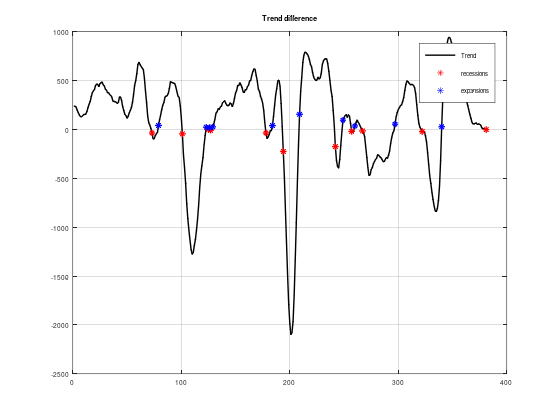

In [29]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')
plot(dtrendsteel,'k','linewidth',1.4)
hold on
plot(confirmedrecsteel,recessionsteel,'r*','linewidth',1.3) % red are recessions
plot(confirmedexpsteel,expansionsteel,'b*','linewidth',1.3) % green are expansions
grid on
title('Trend difference')
legend('Trend','recessions','expansions')

In [30]:
disp('DATES OF EXPANSIONS AND RECESSIONS')
disp('Steel manufacturing New Orders')
expansiontimesteel % date when trend derivative >0
recessiontimesteel % date when trend derivative <0
disp('Steel dataset simillar to coincident indicator')

DATES OF EXPANSIONS AND RECESSIONS
Steel manufacturing New Orders
expansiontimesteel =

1998-09-01  
2002-05-01  
2002-08-01  
2002-11-01  
2007-06-01  
2009-07-01  
2012-11-01  
2013-10-01  
2016-11-01  
2020-06-01  

recessiontimesteel =

1998-03-01  
2000-07-01  
2002-07-01  
2002-09-01  
2006-12-01  
2008-04-01  
2012-04-01  
2013-07-01  
2014-05-01  
2018-12-01  
2023-11-01  

Steel dataset simillar to coincident indicator


In [31]:
disp('GDP TREND')


% NOT SEASONALLY ADJUSTED QUARTERLY REAL GDP
yt=csvread(
"C:/Users/dishi/TFG-LDHR/MY_DATA/gdp.csv");
yt=yt(2:213,2); % column 2 and from row 2 to to 213 (01-1970 start and 12-2023 end)
yt=log(yt);
size(yt) % dimension of gdp vector 
timeyt=timefmt4(4,1970,1,212); % quarterly dates
timeyt=timeyt(3:end,:); % from 2'nd date since we need it to match the differenced vector
size(timeyt)

PaPyt=4./[0,1,2] % vector con periodos correspondientes a la estacionalidad para datos trimestrales. 
TVPaPyt=[1 1 1;1 0 0] 
warning('off','all');
[VARyt,Pyt,TVPyt,oaryt]=autodhr(yt,4,[],[],PaPyt,TVPaPyt,1) 
NVRyt=VARyt(2:4)./VARyt(1) % calculation of variance ratios 
filt=0;
[trendyt,seasonyt,cycleyt,irregyt]=dhrfilt(yt,Pyt,TVPyt,VARyt,4,filt,0);

GDP TREND
ans =

   212     1

ans =

   211    12

PaPyt =

   Inf     4     2

TVPaPyt =

   1   1   1
   1   0   0

VARyt =

   4.9473e-05   2.4366e-06   3.1065e-07   1.5659e-07

Pyt =

   Inf     4     2

TVPyt =

   1   1   1
   1   0   0

oaryt = 22
NVRyt =

   4.9251e-02   6.2791e-03   3.1651e-03



GDP PC AND ITS TREND
FIRST DIFFERENCE OF TREND
ans =

   211     1

ans = 0.015351


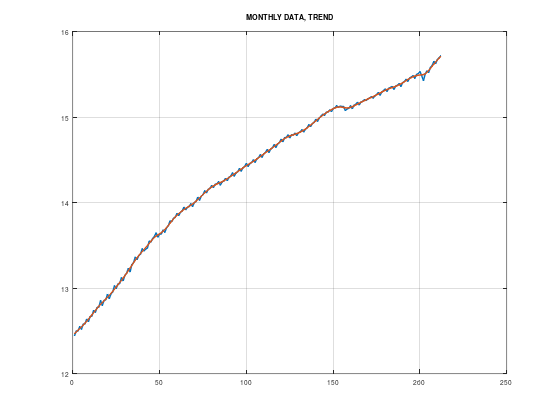

In [32]:
disp('GDP PC AND ITS TREND')
trendyt=trendyt(:,1); % the first column of trend is the trend vector
plot([yt,trendyt],'linewidth',1.4)
grid on
title('MONTHLY DATA, TREND')
disp('FIRST DIFFERENCE OF TREND')
dtrendyt=diff(trendyt); % first difference of trend vector
size(dtrendyt)
mean(dtrendyt)

In [33]:
disp('CONFIRMATION OF A RECESSION')
window = 1; % window size for consecutive negative values
confirmedrecyt = []; % array to store the indices of confirmation of a recession
% Loop through the elements of dtrend
for i = 2:(length(dtrendyt) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendyt(i:i+window-1) < 0.015) && dtrendyt(i-1) > 0.015 
        confirmedrecyt=[confirmedrecyt, i + window - 1]; % if the condition is met, store the index of the nth negative element
    end
end
disp('Indices of the nth negative element of sm_dtrend preceded by a positive value:');
confirmedrecyt=confirmedrecyt'; % to column vector from row vector 
size(dtrendyt) % the vector we are using
size(timeyt) % checking time vector size
recessiontimeyt=timeyt(confirmedrecyt,:); % DATES OF CONFIRMED RECESSION
recessionyt=dtrendyt(confirmedrecyt,:); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
Indices of the nth negative element of sm_dtrend preceded by a positive value:
ans =

   211     1

ans =

   211    12



In [34]:
disp('CONFIRMATION OF EXPANSION')
window = 1;  % window size for consecutive values
confirmedexpyt = [];  % array to store the indices of confirmation of a recession or expansion
% Loop through the elements of dtrend
for i = 2:(length(dtrendyt) - window + 1)
    if all(dtrendyt(i:i+window-1) > 0.015) && dtrendyt(i-1) < 0.015
        confirmedexpyt = [confirmedexpyt, i + window - 1];
    end
end

disp('Indices of the nth positive element of dtrendhouse preceded by a negative value:');
confirmedexpyt = confirmedexpyt';  % Convert to a column vector
expansiontimeyt=timeyt(confirmedexpyt,:);
expansionyt=dtrendyt(confirmedexpyt,:);

CONFIRMATION OF EXPANSION
Indices of the nth positive element of dtrendhouse preceded by a negative value:


PLOTTING TREND WITH RECESSION AND EXPANSION DATES


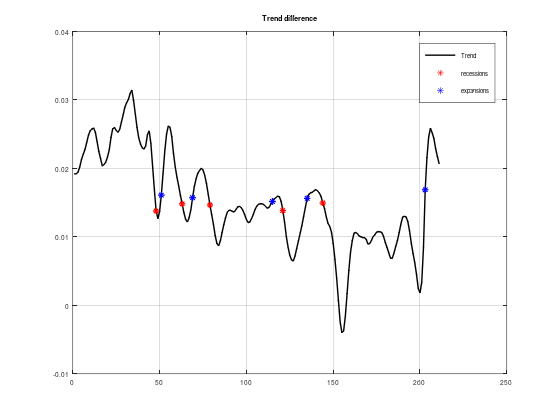

In [35]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')
plot(dtrendyt,'k','linewidth',1.4)
hold on
plot(confirmedrecyt,recessionyt,'r*','linewidth',1.3) % red are recessions
plot(confirmedexpyt,expansionyt,'b*','linewidth',1.3) % blue are expansions
grid on
title('Trend difference')
legend('Trend','recessions','expansions')

In [36]:
disp('DATES OF EXPANSIONS AND RECESSIONS')
disp('GDP')
expansiontimeyt % date when trend derivative > growth rate
recessiontimeyt % date when trend derivative < growth rate

DATES OF EXPANSIONS AND RECESSIONS
GDP
expansiontimeyt =

1982-04-01  
1987-02-01  
1998-04-01  
2003-04-01  
2020-04-01  

recessiontimeyt =

1982-01-01  
1985-04-01  
1989-04-01  
2000-02-01  
2006-01-01  



In [37]:
disp('RETAIL SALES TRADE, MIL OF DOLLARS, MONTHLY, NOT SEASONALLY ADJUSTED')

retail=csvread(
"./MY_DATA/retail.csv");
retail=retail(2:188,2); % from row 2 to row 188 (02-1992 to 08-2007) and 2nd row because 1st row are dates

size(retail) % should have 187 entries
timeretail=timefmt4(12,1992,2,187); % time vector for retail sales trade dataset
timeretail=timeretail(3:end,:); % from 2'nd date since we need it to match the differenced vector, while 1st entry is a string
size(timeretail) % 186 dates

PaPret=12./(0:6) % divide by the half of the observations per year, due to harmonics
TVPaPret=[1 1 1 1 1 1 1;1 0 0 0 0 0 0] 

[VARret,Pret,TVPret,oarret]=autodhr(retail,12,[],[],PaPret,TVPaPret,1) 
NVRret=VARret(2:8)./VARret(1) % calculation of variance ratios 
filt=0;
[trendretail,seasonret,cycleret,irregret]=dhrfilt(retail,Pret,TVPret,VARret,12,filt,0);

RETAIL SALES TRADE, MIL OF DOLLARS, MONTHLY, NOT SEASONALLY ADJUSTED
ans =

   187     1

ans =

   186    12

PaPret =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPaPret =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

VARret =

 Columns 1 through 6:

   4.1349e+06   3.2444e+04   8.3969e+04   2.9400e+04   5.7823e+04   2.4401e+05

 Columns 7 and 8:

   1.7668e+05   1.5326e+04

Pret =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPret =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

oarret = 26
NVRret =

 Columns 1 through 6:

   7.8465e-03   2.0308e-02   7.1104e-03   1.3984e-02   5.9014e-02   4.2731e-02

 Column 7:

   3.7066e-03



RETAIL SALES TRADE AND ITS TREND
FIRST DIFFERENCE OF TREND
ans =

   186     1



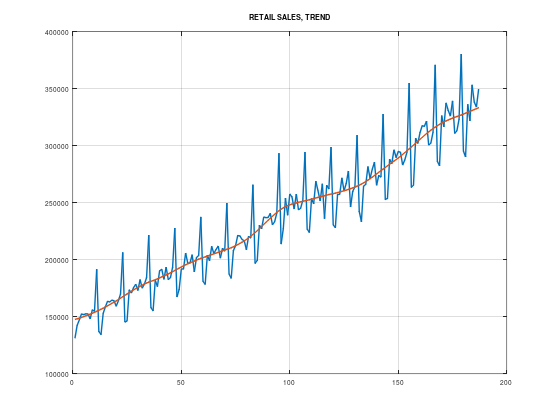

In [38]:
disp('RETAIL SALES TRADE AND ITS TREND')
trendretail=trendretail(:,1); % the first column of trend is the trend vector
plot([retail,trendretail],'linewidth',1.4)
grid on
title('RETAIL SALES, TREND')
disp('FIRST DIFFERENCE OF TREND')
dtrendretail=diff(trendretail); % first difference of trend vector
size(dtrendretail) % now the same size as the time vector

In [39]:
disp('CONFIRMATION OF A RECESSION')
window = 1; % window size for consecutive negative values
confirmedrecretail = []; % array to store the indices of confirmation of a recession
% Loop through the elements of dtrend
for i = 2:(length(dtrendretail) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendretail(i:i+window-1) < 997.39) && dtrendretail(i-1) > 997.39
        confirmedrecretail=[confirmedrecretail, i + window - 1]; % if the condition is met, store the index of the nth negative element
    end
end
disp('Indices of the nth negative element of sm_dtrend preceded by a positive value:');
confirmedrecretail=confirmedrecretail'; % to column vector from row vector 
recessiontimeretail=timeretail(confirmedrecretail,:); % DATES OF CONFIRMED RECESSION
recessionretail=dtrendretail(confirmedrecretail,:); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
Indices of the nth negative element of sm_dtrend preceded by a positive value:


In [40]:
disp('CONFIRMATION OF EXPANSION')
window = 1;  % window size for consecutive values
confirmedexpretail = [];  % array to store the indices of confirmation of a recession or expansion
% Loop through the elements of dtrend
for i = 2:(length(dtrendretail) - window + 1)
    if all(dtrendretail(i:i+window-1) > 997.39) && dtrendretail(i-1) < 997.39
        confirmedexpretail = [confirmedexpretail, i + window - 1];
    end
end
disp('Indices of the nth positive element of dtrendhouse preceded by a negative value:');
confirmedexpretail = confirmedexpretail';  % Convert to a column vector
expansiontimeretail=timeretail(confirmedexpretail,:);
expansionretail=dtrendretail(confirmedexpretail,:);

CONFIRMATION OF EXPANSION
Indices of the nth positive element of dtrendhouse preceded by a negative value:


PLOTTING TREND WITH RECESSION AND EXPANSION DATES


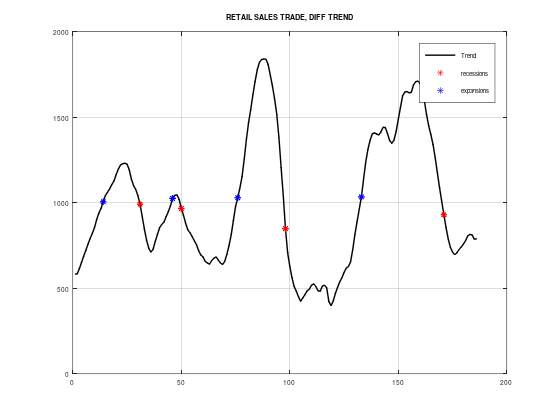

In [41]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')
plot(dtrendretail,'k','linewidth',1.4)
hold on
plot(confirmedrecretail,recessionretail,'r*','linewidth',1.3) % red are recessions
plot(confirmedexpretail,expansionretail,'b*','linewidth',1.3) % blue are expansions
grid on
title('RETAIL SALES TRADE, DIFF TREND')
legend('Trend','recessions','expansions')

In [42]:
disp('DATES OF EXPANSIONS AND RECESSIONS OF RETAIL SALES TRADE')
expansiontimeretail % date when trend derivative > growth rate
recessiontimeretail % date when trend derivative < growth rate
disp('Dates do not really coincide with NBER dating')

DATES OF EXPANSIONS AND RECESSIONS OF RETAIL SALES TRADE
expansiontimeretail =

1993-04-01  
1995-12-01  
1998-06-01  
2003-03-01  

recessiontimeretail =

1994-09-01  
1996-04-01  
2000-04-01  
2006-05-01  

Dates do not really coincide with NBER dating


In [43]:
disp('AVERAGE WEEKLY HOURS WORKED IN MANUFACTURING, MONTHLY, NOT ADJUSTED')
% IT IS A PROXY FOR THE IDLENESS OF THE ECONOMY 
idle=csvread(
"./MY_DATA/idle.csv");
idle=idle(639:1021,2); % column 2 and from 02-1992 to 12-2023
size(idle) % dimension
timeidle=timefmt4(12,1992,2,383); % monthly dates vector
timeidle=timeidle(3:end,:); % from 2'nd date since we need it to match the differenced vector
size(timeidle)

PaPidle=12./(0:6) % divide by the half of the observations per year, due to harmonics
TVPaPidle=[1 1 1 1 1 1 1;1 0 0 0 0 0 0] 

[VARidle,Pidle,TVPidle,oaridle]=autodhr(idle,12,[],[],PaPidle,TVPaPidle,1) 
NVRidle=VARidle(2:8)./VARidle(1) % calculation of variance ratios 
filt=0;
[trendidle,seasonidle,cycleidle,irregidle]=dhrfilt(idle,Pidle,TVPidle,VARidle,12,filt,0);

AVERAGE WEEKLY HOURS WORKED IN MANUFACTURING, MONTHLY, NOT ADJUSTED
ans =

   383     1

ans =

   382    12

PaPidle =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPaPidle =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

VARidle =

 Columns 1 through 7:

   0.026946   0.000223   0.002341   0.000382   0.000005   0.000192   0.000003

 Column 8:

          0

Pidle =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPidle =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

oaridle = 36
NVRidle =

   0.008292   0.086889   0.014168   0.000186   0.007131   0.000104          0



HOURS WORKED IN MANUF AND ITS TREND


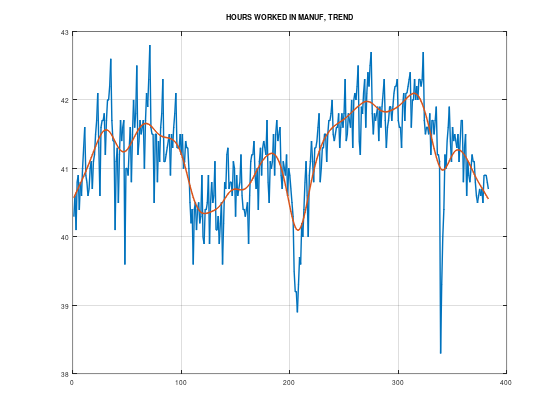

In [44]:
disp('HOURS WORKED IN MANUF AND ITS TREND')
trendidle=trendidle(:,1); % the first column of trend is the trend vector
plot([idle,trendidle],'linewidth',1.4)
grid on
title('HOURS WORKED IN MANUF, TREND')
dtrendidle=diff(trendidle); % first difference of trend vector

In [45]:
disp('CONFIRMATION OF A RECESSION')
window = 1; % window size for consecutive negative values
confirmedrecidle = []; % array to store the indices of confirmation of a recession
% Loop through the elements of dtrend
for i = 2:(length(dtrendidle) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendidle(i:i+window-1) < 0) && dtrendidle(i-1) > 0
        confirmedrecidle=[confirmedrecidle, i + window - 1]; % if the condition is met, store the index of the nth negative element
    end
end
disp('Indices of the nth negative element of sm_dtrend preceded by a positive value:');
confirmedrecidle=confirmedrecidle'; % to column vector from row vector 
recessiontimeidle=timeidle(confirmedrecidle,:); % DATES OF CONFIRMED RECESSION
recessionidle=dtrendidle(confirmedrecidle,:); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
Indices of the nth negative element of sm_dtrend preceded by a positive value:


In [46]:
disp('CONFIRMATION OF EXPANSION')
window = 1;  % window size for consecutive values
confirmedexpidle = [];  % array to store the indices of confirmation of a recession or expansion
% Loop through the elements of dtrend
for i = 2:(length(dtrendidle) - window + 1)
    if all(dtrendidle(i:i+window-1) > 0) && dtrendidle(i-1) < 0
        confirmedexpidle = [confirmedexpidle, i + window - 1];
    end
end
disp('Indices of the nth positive element of dtrendhouse preceded by a negative value:');
confirmedexpidle = confirmedexpidle';  % Convert to a column vector
expansiontimeidle=timeidle(confirmedexpidle,:);
expansionidle=dtrendidle(confirmedexpidle,:);

CONFIRMATION OF EXPANSION
Indices of the nth positive element of dtrendhouse preceded by a negative value:


PLOTTING TREND WITH RECESSION AND EXPANSION DATES


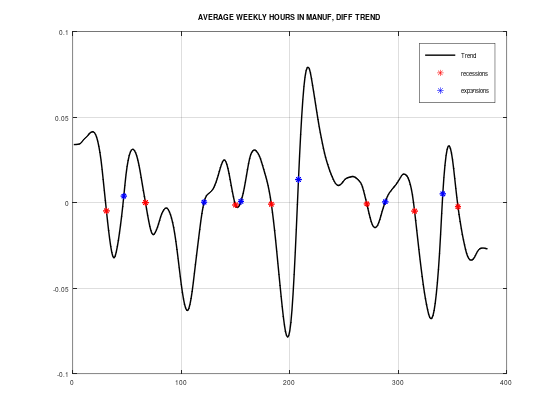

In [47]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')
plot(dtrendidle,'k','linewidth',1.4)
hold on
plot(confirmedrecidle,recessionidle,'r*','linewidth',1.3) % red are recessions
plot(confirmedexpidle,expansionidle,'b*','linewidth',1.3) % blue are expansions
grid on
title('AVERAGE WEEKLY HOURS IN MANUF, DIFF TREND')
legend('Trend','recessions','expansions')

In [48]:
disp('DATES OF EXPANSIONS AND RECESSIONS OF AVERAGE WEEKLY HOURS WORKED IN MANUFACTURING')
expansiontimeidle % date when trend derivative > growth rate
recessiontimeidle % date when trend derivative < growth rate
disp('Data presents leading and coincident nature')

DATES OF EXPANSIONS AND RECESSIONS OF AVERAGE WEEKLY HOURS WORKED IN MANUFACTURING
expansiontimeidle =

1996-01-01  
2002-03-01  
2005-01-01  
2009-06-01  
2016-02-01  
2020-07-01  

recessiontimeidle =

1994-09-01  
1997-09-01  
2004-08-01  
2007-05-01  
2014-09-01  
2018-05-01  
2021-09-01  

Data presents leading and coincident nature


In [49]:
disp('Checking correct indexing')
idle(5)
timeidle(4,:)

Checking correct indexing
ans = 40.900
ans = 1992-06-01  


In [50]:
disp('INDICADOR COMPUESTO')
k=1; # retardo
b=[trendtrucks,trendhouse,trendsteel,trendidle]';
#b = b(:,1:300);
B=b*(eye(length(b))-ones(length(b))/length(b));
[V,LAMBDA] = eig(B(:,1:length(b)-k)*B(:,k+1:length(b))'/(length(b)^(1)))

[m,ix]=max(diag(LAMBDA))
Weights=V(:,ix)./sum(V(:,ix)) %  NEGATIVE WEIGHT, COUNTERCYCLICAL NATURE OR MULTICOLLINEARITY PROBLEMS

INDICADOR COMPUESTO
V =

   4.6050e-04  -1.5198e-01   9.8615e-01  -6.7149e-02
  -3.8778e-04  -9.8838e-01  -1.5028e-01   1.3331e-02
   1.0000e+00  -3.8168e-04  -5.0945e-04   1.7885e-05
   2.0151e-05   2.6093e-03   7.0231e-02   9.9765e-01

LAMBDA =

Diagonal Matrix

   8.0734e+07            0            0            0
            0   1.0327e+03            0            0
            0            0   1.5559e+01            0
            0            0            0   1.5194e-01

m = 8.0734e+07
ix = 1
Weights =

   4.6046e-04
  -3.8774e-04
   9.9991e-01
   2.0149e-05



PLOTTING THE COMPOSITE INDICATOR
ans =

   382     1

ans =

   382    12



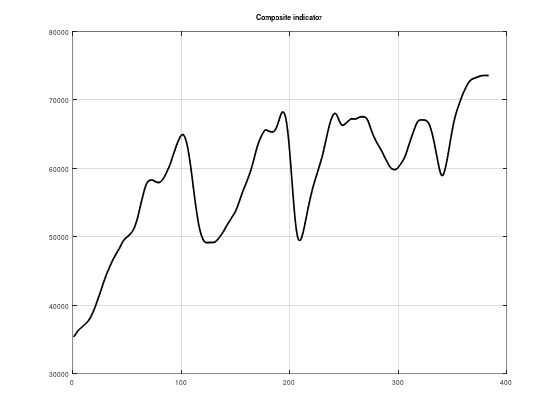

In [57]:
disp('PLOTTING THE COMPOSITE INDICATOR')
cli=b'*Weights;
plot(cli,'linewidth',1.6,'k')
grid on
title('Composite indicator')
dcli=diff(cli);
size(dcli)
size(timeidle)

In [71]:
disp('CONFIRMATION OF A RECESSION')
window=6; % window size for consecutive negative values
confirmedreccli=[]; % array to store the indices of confirmation of a recession
for i = 2:(length(dcli) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dcli(i:i+window-1) < 0) && dcli(i-1) > 0 
        confirmedreccli=[confirmedreccli, i + window - 1]; % if the condition is met, store the index of the nth negative element
    end
end
disp('Indices of the nth negative element of sm_dtrend preceded by a positive value:');
confirmedreccli=confirmedreccli'; 
recessiontimecli=timeidle(confirmedreccli,:); % DATES OF CONFIRMED RECESSION
recessioncli=dcli(confirmedreccli,:); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
Indices of the nth negative element of sm_dtrend preceded by a positive value:


In [72]:
disp('CONFIRMATION OF EXPANSION')
window = 6;  % window size for consecutive values
confirmedexpcli = [];  % array to store the indices of confirmation of a recession or expansion
for i = 2:(length(dcli) - window + 1)
    if all(dcli(i:i+window-1) > 0) && dcli(i-1) < 0
        confirmedexpcli=[confirmedexpcli, i + window - 1];
    end
end
disp('Indices of the nth positive element of dtrendhouse preceded by a negative value:');
confirmedexpcli = confirmedexpcli';
expansiontimecli=timeidle(confirmedexpcli,:);
expansioncli=dcli(confirmedexpcli,:);

CONFIRMATION OF EXPANSION
Indices of the nth positive element of dtrendhouse preceded by a negative value:


PLOTTING CLI WITH RECESSION AND EXPANSION DATES


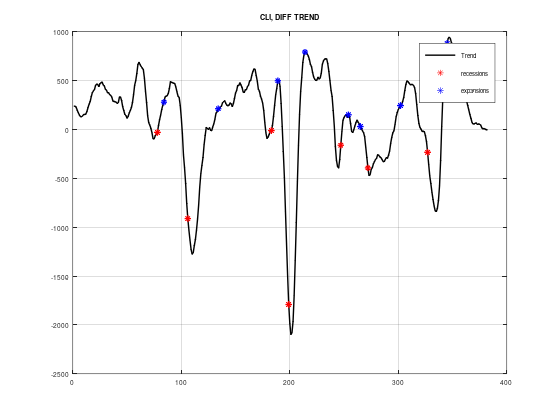

In [73]:
disp('PLOTTING CLI WITH RECESSION AND EXPANSION DATES')
plot(dcli,'k','linewidth',1.4)
hold on
plot(confirmedreccli,recessioncli,'r*','linewidth',1.3) % red are recessions
plot(confirmedexpcli,expansioncli,'b*','linewidth',1.3) % blue are expansions
grid on
title('CLI, DIFF TREND')
legend('Trend','recessions','expansions')

In [74]:
disp('DATES OF EXPANSIONS AND RECESSIONS PREDICTED BY THE INDICATOR')
expansiontimecli % date when trend derivative > growth rate
recessiontimecli % date when trend derivative < growth rate
disp('Shows lagging nature and does not really coincide with NBER dating..')

DATES OF EXPANSIONS AND RECESSIONS PREDICTED BY THE INDICATOR
expansiontimecli =

1999-02-01  
2003-04-01  
2007-11-01  
2009-12-01  
2013-04-01  
2014-03-01  
2017-04-01  
2020-11-01  

recessiontimecli =

1998-08-01  
2000-12-01  
2007-05-01  
2008-09-01  
2012-09-01  
2014-10-01  
2019-05-01  

Shows lagging nature and does not really coincide with NBER dating..
